<h2 style='text-align:center; color:blue'><b>Unlocking Airbnb Success: Occupancy Analysis and Strategic Recommendations for Low-Demand Neighborhoods</b></h1>
<h5 style="text-align: center;"></h2>

<a id="numerical"></a>
# <b><span style='color:darkturquoise'>Section 1 |</span><span style='color:darkblue'> Introduction</span></b>

____

<a id="basic"></a>
### <b><span style='color:darkblue'> About the Company</span></b>
<div class="alert alert-block alert-success">

Airbnb, Inc. is an American company operating an online marketplace for short-and-long-term homestays and experiences in various countries and regions. 

The company also acts as a broker and charges a commission from each booking. 

<a id="basic"></a>
### <b><span style='color:darkblue'> Business Context</span></b>
<div class="alert alert-block alert-success">

The short-term rental sector, notably on platforms like as Airbnb, has expanded significantly over the last decade. However, not all communities gain equally from the development. 

While certain regions routinely achieve high occupancy rates due to their location, facilities, and appeal with travelers, others struggle with low occupancy, resulting in diminished revenue possibilities for property owners. 


<a id="basic"></a>
### <b><span style='color:darkblue'> Business Task</span></b>

<a id="business-task"></a>
<div class="alert alert-block alert-success">
<b><span style='color:darkblue'>Business Task</span></b>

**The primary objective** of this analysis is to discover and understand the important factors that contribute to low occupancy rates in specific neighborhoods. 
The analysis compares these locations to high-occupancy neighborhoods in order to identify actionable information that can help with strategic decisions.

**Specific aims include:**

**Occupancy Analysis:** Compare occupancy rates among neighborhoods to determine which have significantly inferior performance.

**Compare low-occupancy** communities to surrounding high-occupancy areas to see whether there are any disparities in pricing, amenities, or other considerations.

**Strategic recommendations:** Make specific recommendations to property owners and managers about how to increase occupancy rates in low-demand neighborhoods. This includes price plans, marketing approaches, and property improvements.

**Marketing and Improvement methods:** Investigate and recommend successful local marketing methods and property enhancements for attracting more guests and increasing bookings in underperforming locations.


<a id="numerical"></a>
# <b><span style='color:darkturquoise'>Section 2 |</span><span style='color:darkblue'> Data Examination</span></b>


In [2]:
#Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopy.distance as dis

In [3]:
import pandas as pd

sep = pd.read_csv('sep23.csv', encoding='ISO-8859-1')
dec = pd.read_csv('dec_23.csv', encoding='ISO-8859-1')

#concate 2 data frame 
df = pd.concat([sep, dec], ignore_index=True)

# Dropping the 'neighbourhood_group' column from the dataframe
df = df.drop(columns=['neighbourhood_group'])


In [9]:
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,761411.0,Condo in Amsterdam · ?4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,Noord-Oost,52.40164,4.95106,Private room,61.0,3,303,8/19/2023,2.30,2,272,26,0363 D4AD DCF3 E72A 56A2
1,768274.0,Rental unit in Amsterdam · ?4.83 · 1 bedroom ·...,3678216,J & R,Westerpark,52.38855,4.88521,Entire home/apt,327.0,3,78,8/16/2023,0.64,1,16,6,0363 7A50 18E7 51D1 B7F9
2,768737.0,Boat in Amsterdam · ?4.82 · 1 bedroom · 1 bed ...,3877342,Nicole,Westerpark,52.37824,4.86826,Private room,109.0,2,341,8/24/2023,2.73,3,29,43,036396BE30827DDB9575
3,771217.0,Houseboat in Amsterdam · ?5.0 · 3 bedrooms · 3...,4068486,Danielle,Zuid,52.34091,4.84802,Entire home/apt,290.0,3,10,1/2/2019,0.11,1,0,0,0363 D807 AD6C 499A F871
4,771343.0,Rental unit in Amsterdam · ?4.89 · 1 bedroom ·...,2313061,Marcel,Centrum-West,52.37641,4.88303,Private room,150.0,1,699,9/1/2023,6.62,2,196,110,0363 8C61 E9B9 5582 913E


| Field Name                           | Description                                                                                      |
|--------------------------------------|--------------------------------------------------------------------------------------------------|
| **Unnamed: 0**                       | Seems like an index column. We can drop this.                                                     |
| **id**                               | Listing ID (float type but should be integer).                                                    |
| **name**                             | Descriptions of listings.                                                                         |
| **host_id**                          | Numeric ID of the host (integer).                                                                 |
| **host_name**                        | Name of the host.                                                                                 |
| **neighbourhood**                    | Location details.                                                                                 |
| **latitude, longitude**              | Coordinates of the listing.                                                                       |
| **room_type**                        | Type of room offered.                                                                             |
| **price**                            | Some missing values.                                                                              |
| **minimum_nights**                   | Numeric field.                                                                                    |
| **number_of_reviews**                | Numeric field.                                                                                    |
| **calculated_host_listings_count**   | Numeric field.                                                                                    |
| **availability_365**                 | Numeric field.                                                                                    |
| **number_of_reviews_ltm**            | Numeric field.                                                                                    |
| **last_review**                      | Last review date (string, should be date format).                                                 |
| **reviews_per_month**                | Some missing values (float).                                                                      |
| **license**                          | Some missing values.                                                                              |


In [4]:

# Extract relevant columns for the analysis
df_room_price = df[['room_type', 'price']]

# Drop rows with missing values in the 'price' column
df_room_price = df_room_price.dropna()

# Ensure the data is cleaned and ready for analysis
df_room_price.head()


,room_type,price
0,Private room,61.0
1,Entire home/apt,327.0
2,Private room,109.0
3,Entire home/apt,290.0
4,Private room,150.0


In [6]:
print('\033[1;94mRange of Values for Each Column\033[0m')

print(f'Number of rows and columns: {df.shape}')
pd.DataFrame({
    'Type': df.dtypes,
    'N/A (%)': df.isna().mean() * 100,
    'Unique': df.nunique(),
    'Sample': [df[col].unique() for col in df.columns]
})

Range of Values for Each Column
Number of rows and columns: (17125, 17)


,Type,N/A (%),Unique,Sample
id,float64,0.000000,9425,"[761411.0, 768274.0, 768737.0, 771217.0, 77134..."
name,object,0.000000,4940,[Condo in Amsterdam · ?4.74 · 1 bedroom · 1 be...
host_id,int64,0.000000,8233,"[4013546, 3678216, 3877342, 4068486, 2313061, ..."
host_name,object,0.000000,3484,"[Xsjong, J & R, Nicole, Danielle, Marcel, Gian..."
neighbourhood,object,0.000000,22,"[Noord-Oost, Westerpark, Zuid, Centrum-West, S..."
latitude,float64,0.000000,6714,"[52.40164, 52.38855, 52.37824, 52.34091, 52.37..."
longitude,float64,0.000000,7801,"[4.95106, 4.88521, 4.86826, 4.84802, 4.88303, ..."
room_type,object,0.000000,4,"[Private room, Entire home/apt, Hotel room, Sh..."
price,float64,1.728467,716,"[61.0, 327.0, 109.0, 290.0, 150.0, 75.0, 159.0..."
minimum_nights,int64,0.000000,58,"[3, 2, 1, 5, 10, 60, 14, 4, 28, 29, 7, 91, 6, ..."


<a id="numerical"></a>
# <b><span style='color:darkturquoise'>Section 3 |</span><span style='color:darkblue'> Data Transformation</span></b>

____

Before making any modifications, make sure to  keep a copy of the original dataset. This provides a reference point to compare against or refer to if necessary.

In [9]:
# Convert 'id' to integer
df['id'] = df['id'].astype(int)

# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Handle missing values
# For 'price' column, we can fill missing values with the median price
df['price'].fillna(df['price'].median(), inplace=True)

# For 'reviews_per_month', fill missing values with 0 (assuming no reviews in those months)
df['reviews_per_month'].fillna(0, inplace=True)

# For 'license', we can fill missing values with 'Not Provided'
df['license'].fillna('Not Provided', inplace=True)

mean_date = df['last_review'].mean()
df['last_review'].fillna(mean_date, inplace=True)



In [10]:
print('\033[1;94mRange of Values for Each Column\033[0m')

print(f'Number of rows and columns: {df.shape}')
pd.DataFrame({
    'Type': df.dtypes,
    'N/A (%)': df.isna().mean() * 100,
    'Unique': df.nunique(),
    'Sample': [df[col].unique() for col in df.columns]
})

Range of Values for Each Column
Number of rows and columns: (17125, 17)


,Type,N/A (%),Unique,Sample
id,int32,0.0,5461,"[761411, 768274, 768737, 771217, 771343, 77175..."
name,object,0.0,4940,[Condo in Amsterdam · ?4.74 · 1 bedroom · 1 be...
host_id,int64,0.0,8233,"[4013546, 3678216, 3877342, 4068486, 2313061, ..."
host_name,object,0.0,3484,"[Xsjong, J & R, Nicole, Danielle, Marcel, Gian..."
neighbourhood,object,0.0,22,"[Noord-Oost, Westerpark, Zuid, Centrum-West, S..."
latitude,float64,0.0,6714,"[52.40164, 52.38855, 52.37824, 52.34091, 52.37..."
longitude,float64,0.0,7801,"[4.95106, 4.88521, 4.86826, 4.84802, 4.88303, ..."
room_type,object,0.0,4,"[Private room, Entire home/apt, Hotel room, Sh..."
price,float64,0.0,716,"[61.0, 327.0, 109.0, 290.0, 150.0, 75.0, 159.0..."
minimum_nights,int64,0.0,58,"[3, 2, 1, 5, 10, 60, 14, 4, 28, 29, 7, 91, 6, ..."


<a id="numerical"></a>
# <b><span style='color:darkturquoise'>Section 4 |</span><span style='color:darkblue'> Data Exploration</span></b>


### Occupancy Rates Across Neighborhoods

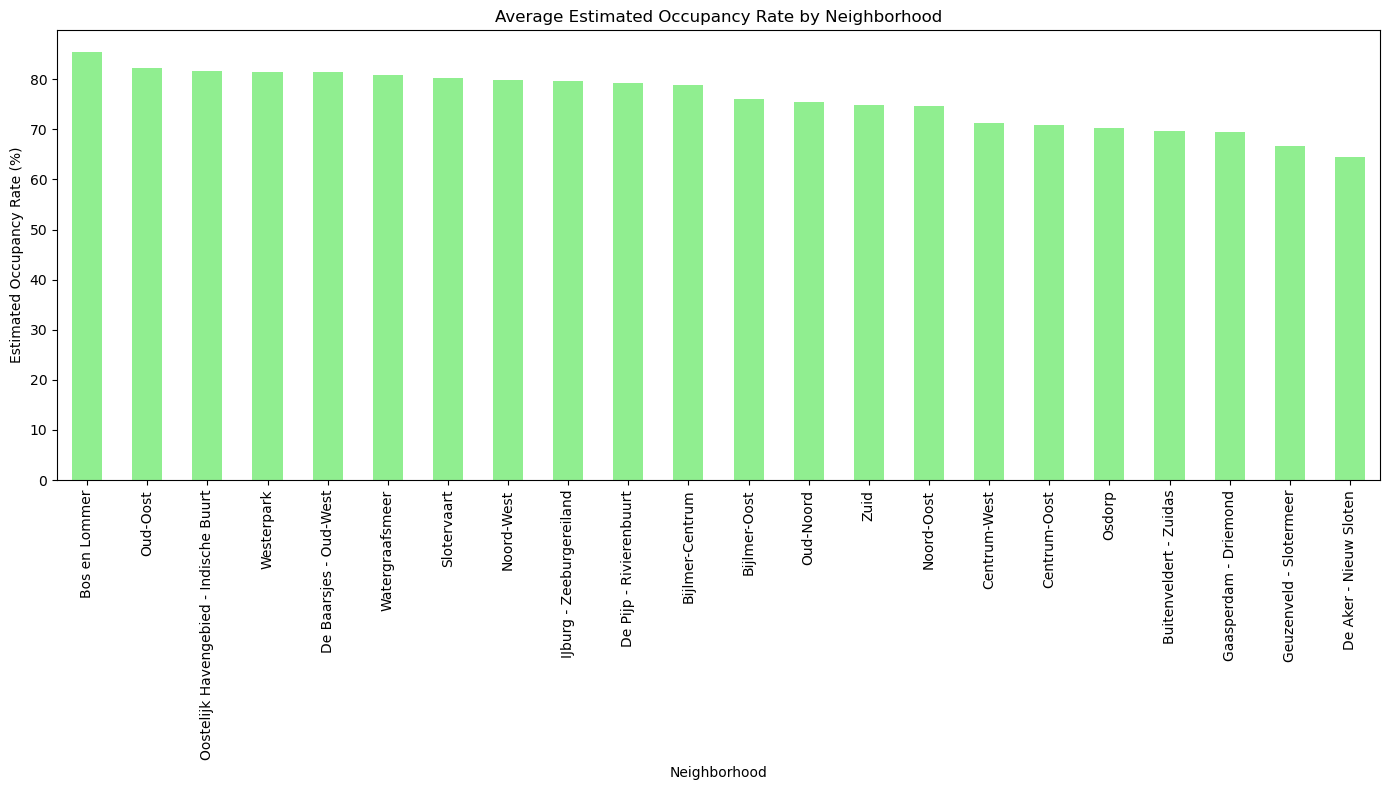

In [18]:
# Calculate the average estimated occupancy rate by neighborhood
avg_occupancy_rate_by_neighborhood = df.groupby('neighbourhood')['estimated_occupancy_rate'].mean().sort_values(ascending=False)

# Plot the average occupancy rate by neighborhood
plt.figure(figsize=(14, 8))
avg_occupancy_rate_by_neighborhood.plot(kind='bar', color='lightgreen')
plt.title('Average Estimated Occupancy Rate by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Estimated Occupancy Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


<div class="alert alert-block alert-success">
Business insights:

- High Occupancy Areas: Some neighborhoods have higher estimated occupancy rates, which means that properties there are more frequently rented. This shows a high demand in these areas, possibly due to their popularity, convenience, or tourist appeal.
- Low Occupancy Areas: In contrast, neighborhoods with lower occupancy rates may be less in demand, or the properties may be more expensive, resulting in fewer bookings. These places may require additional marketing or price tactics to increase occupancy.

c:\Users\galuh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


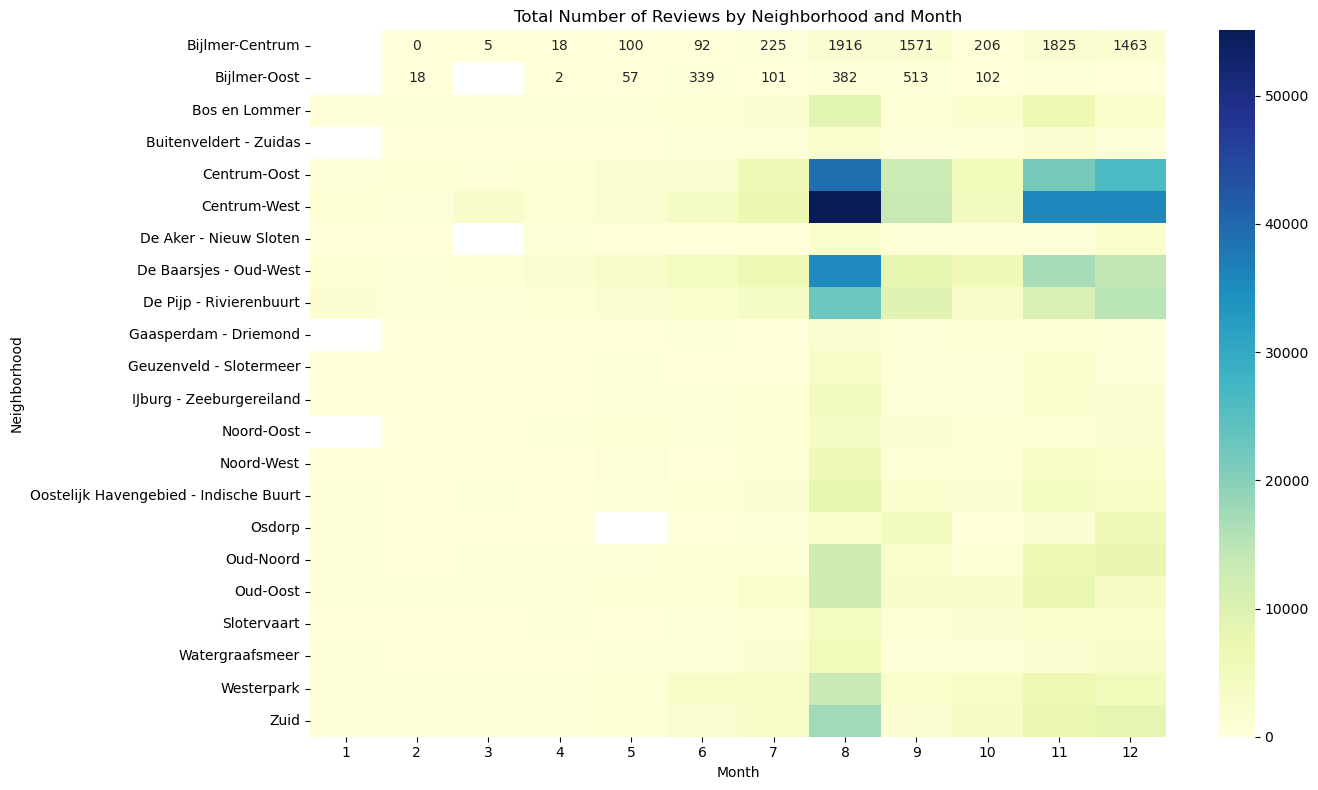

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'last_review' to datetime and extract the month
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['month'] = df['last_review'].dt.month

# Create a pivot table: total number of reviews per neighborhood by month
reviews_by_neighborhood_month = df.pivot_table(
    index='neighbourhood', 
    columns='month', 
    values='number_of_reviews', 
    aggfunc='sum'
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(reviews_by_neighborhood_month, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Total Number of Reviews by Neighborhood and Month')
plt.xlabel('Month')
plt.ylabel('Neighborhood')
plt.tight_layout()

plt.show()


Business insights: Key observations include:

    Seasonal Trends: Certain neighborhoods experience peak activity during various months, demonstrating seasonality in bookings. For example, particular places may have increased activity throughout the summer or during holiday seasons.
    Consistently Busy areas: A few areas experience high levels of activity throughout several months, indicating that they are popular year-round.
    Low Activity Areas: In contrast, certain neighborhoods experience reduced activity throughout the year, indicating that they are not as popular or have a narrower appeal.

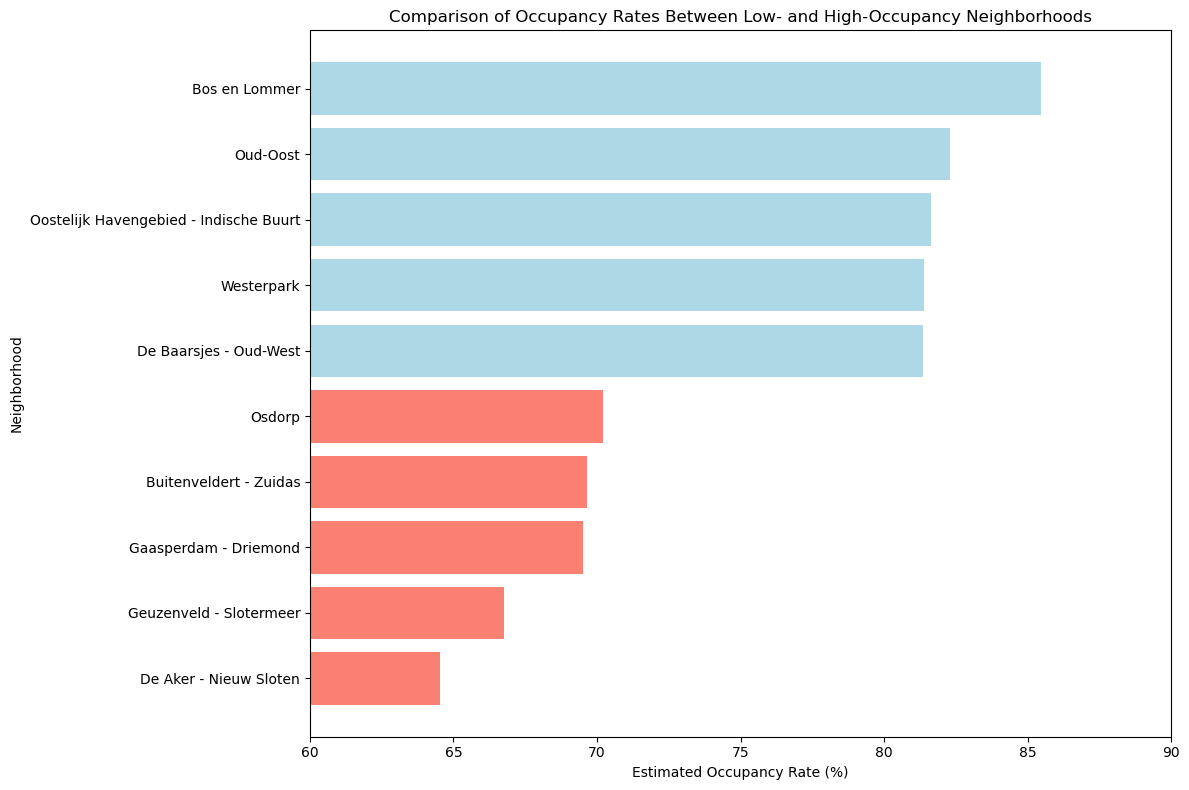

In [24]:

# Calculate the estimated occupancy rate again
df['estimated_occupancy_rate'] = (365 - df['availability_365']) / 365 * 100

# Calculate the average estimated occupancy rate by neighborhood
avg_occupancy_rate_by_neighborhood = df.groupby('neighbourhood')['estimated_occupancy_rate'].mean().sort_values(ascending=False)

# Identify the top 5 neighborhoods with the lowest average estimated occupancy rates
lowest_occupancy_neighborhoods = avg_occupancy_rate_by_neighborhood.tail(5)

# Identify the top 5 neighborhoods with the highest average estimated occupancy rates
highest_occupancy_neighborhoods = avg_occupancy_rate_by_neighborhood.head(5)

# Combine the low-occupancy and high-occupancy neighborhoods for comparison
comparison_neighborhoods_df = pd.concat([lowest_occupancy_neighborhoods, highest_occupancy_neighborhoods]).sort_values(ascending=False)
comparison_neighborhoods_df = comparison_neighborhoods_df.reset_index()
comparison_neighborhoods_df.columns = ['Neighborhood', 'Occupancy Rate (%)']

# Determine the category for coloring (Low or High Occupancy)
comparison_neighborhoods_df['Category'] = ['High Occupancy'] * 5 + ['Low Occupancy'] * 5

# Plotting the comparison
plt.figure(figsize=(12, 8))
colors = ['salmon' if category == 'Low Occupancy' else 'lightblue' for category in comparison_neighborhoods_df['Category']]
plt.barh(comparison_neighborhoods_df['Neighborhood'], comparison_neighborhoods_df['Occupancy Rate (%)'], color=colors)
plt.xlabel('Estimated Occupancy Rate (%)')
plt.ylabel('Neighborhood')
plt.title('Comparison of Occupancy Rates Between Low- and High-Occupancy Neighborhoods')
plt.xlim(60, 90)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()


Insights:

    All high-occupancy neighborhoods have rates above 81%, which is much higher than low-occupancy neighborhoods, which have rates ranging from 64% to 70%.
    Bos en Lommer and Oud-Oost have the greatest occupancy rates, at roughly 85% and 82%, respectively, in sharp contrast to districts like De Aker - Nieuw Sloten.

Interpretation:

    Location Impact: These occupancy rates are most likely influenced by their closeness to city centers, major attractions, and transit hubs. High-occupancy communities may be more centrally placed or have superior facilities and access to nearby attractions.
    Competitive Advantages: High-occupancy areas may have more established markets, with properties offering competitive pricing, greater amenities, or improved guest experiences.

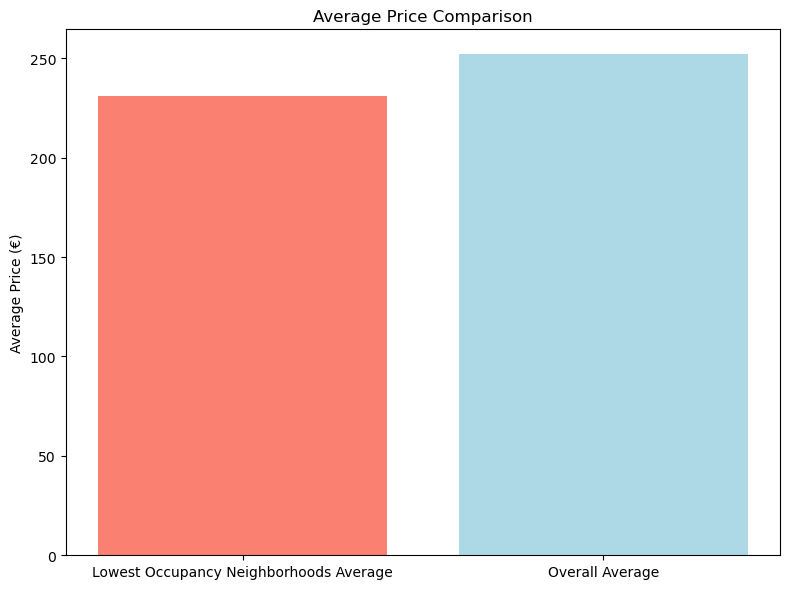

In [27]:

# Calculate the estimated occupancy rate
df['estimated_occupancy_rate'] = (365 - df['availability_365']) / 365 * 100

# Calculate the average estimated occupancy rate by neighborhood
avg_occupancy_rate_by_neighborhood = df.groupby('neighbourhood')['estimated_occupancy_rate'].mean().sort_values(ascending=False)

# Identify the neighborhoods with the lowest average estimated occupancy rates
lowest_occupancy_neighborhoods = avg_occupancy_rate_by_neighborhood.tail(5).index

# Calculate the average price for the lowest occupancy neighborhoods and overall
avg_price_lowest_occupancy = df[df['neighbourhood'].isin(lowest_occupancy_neighborhoods)]['price'].mean()
avg_price_overall = df['price'].mean()

# Prepare data for plotting
labels = ['Lowest Occupancy Neighborhoods Average', 'Overall Average']
prices = [avg_price_lowest_occupancy, avg_price_overall]

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(labels, prices, color=['salmon', 'lightblue'])
plt.title('Average Price Comparison')
plt.ylabel('Average Price (€)')
plt.tight_layout()

plt.show()


Availability in De Aker - Nieuw Sloten


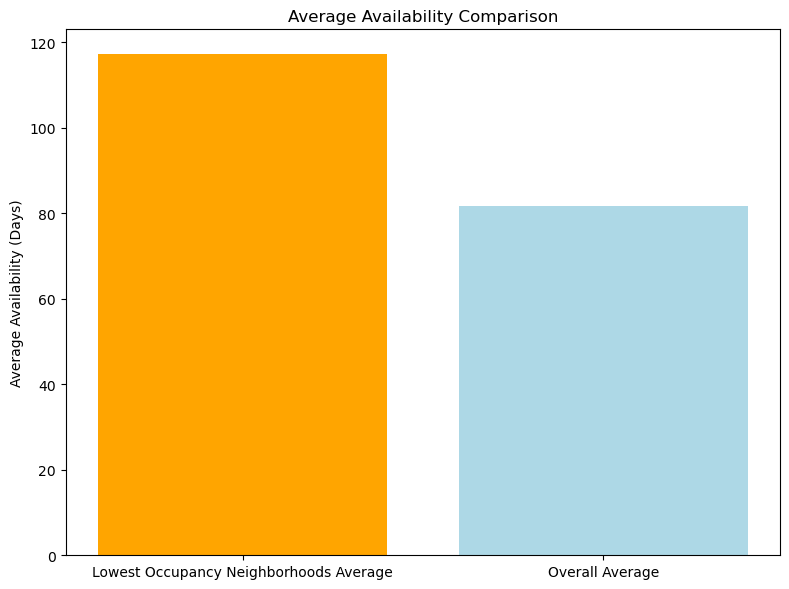

In [28]:
# Calculate the average availability for the lowest occupancy neighborhoods and overall
avg_availability_lowest_occupancy = df[df['neighbourhood'].isin(lowest_occupancy_neighborhoods)]['availability_365'].mean()
avg_availability_overall = df['availability_365'].mean()

# Prepare data for plotting
labels = ['Lowest Occupancy Neighborhoods Average', 'Overall Average']
availability = [avg_availability_lowest_occupancy, avg_availability_overall]

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(labels, availability, color=['orange', 'lightblue'])
plt.title('Average Availability Comparison')
plt.ylabel('Average Availability (Days)')
plt.tight_layout()

plt.show()

<a id="numerical"></a>
# <b><span style='color:darkturquoise'>Section 5 |</span><span style='color:darkblue'> Conclusion & Recommendation</span></b>

<div class="alert alert-block alert-success">
<b>Conclusion:</b><br>
Strategies in improving occupancy in low areas
Now that we've analyzed the performance of low-occupancy neighborhoods, we can begin to plan strategies for improving them. Let's analyze the following techniques to increase occupancy rates:
Improve Property Appeal

Upgrade Amenities: Investing in popular and in-demand amenities like high-speed internet, air conditioning, or unusual features like a hot tub will increase your property's appeal to potential guests. Upgrading facilities can help separate your house from others in the region and justify higher costs, resulting in more bookings.
Professional Photography: Adding high-quality, professional images to your listing can considerably increase its attractiveness. Properties with quality photos receive more clicks and views, resulting in increased booking rates.

2. Targeted Marketing:
Offer discounts and promotions for longer stays, early bookings, or last-minute bookings to attract more guests. Promotions can create a sense of urgency and appeal to budget-conscious customers, resulting in increased occupancy without compromising overall revenue.
Social Media Advertising: Use social media platforms such as Instagram and Facebook to create targeted advertising campaigns. You can target potential visitors who are more likely to book your property based on their interests, demographics, or previous travel history. This allows you to reach a larger audience and improve reservations.

3. Improve Online Presence.
Optimize Listings: Make sure your property listings are full, including detailed descriptions, accurate information, and an engaging headline. Highlight unique advantages that set your property distinct from others in the same neighborhood. A well-optimized listing with relevant keywords might help your property rank higher in search results on platforms such as Airbnb.
Positive reviews: Encourage satisfied guests to submit positive feedback, as establishments with higher ratings tend to receive more bookings. Consider following up with guests after their stay to gather feedback. Responding to reviews, both favorable and negative, indicates your dedication to visitor pleasure and can help boost your property's reputation.

4. Host events or experiences.
Offer Experiences: Collaborate with local guides or experts to provide unique experiences through platforms such as Airbnb Experiences. This might make your listing stand out by providing more than just lodging. Experiences such as guided tours, cooking courses, and cultural events might entice customers seeking a more immersive stay.
Event holding: Consider holding small events, workshops, or retreats on your property. If your property has the space, sponsoring events can assist fill vacancies during quiet seasons while also attracting groups or individuals who would not have considered your property otherwise.

Marketing Strategy
Local SEO Optimization

Local SEO is crucial since it has a direct impact on your visibility in local searches, where potential visitors are most likely to discover your resort. When consumers search for lodgings in your region, optimizing for local search guarantees that your hotel is one of the first to appear.
How To Implement:
Optimize your Google My Business (GMB) listing by updating contact information, uploading high-quality images, and posting regularly about your property.
Respond to feedback and make regular revisions to keep your listing active.
Local Keywords:
Look for local keywords and include them into your website's content, blog articles, and meta descriptions.
To acquire specialized search traffic, choose long-tail phrases such as "best vacation rental near [Local Landmark]".

2. Targeted social media marketing is strategic.
Social media networks allow you to precisely target specific demographics and geographical areas. Geotargeted ads can help you reach potential guests who are most likely to book your resort, while connecting with local communities can increase your brand's visibility and reputation in the area.

How To Implement:
Create geotargeted ads using Facebook Ads Manager or Instagram Ads to target users based on their location. 
Promote seasonal sales, events, or distinctive property features.
Engage in local social media groups and debates. 
Share content that is relevant to the local community, such as support for local issues or highlights from surrounding sites.

Focusing on these techniques can help you increase your property's visibility, generate more bookings, and enhance occupancy rates in your local area. These initiatives are not only significant, but also generate long-term benefits to AirBnB